# 数据可视化作业题目

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [372]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


data preprocessing 

In [373]:
groupd = data.groupby(['year'])

In [374]:
data_byyear = groupd[['passengers']].agg('sum')
data_byyear

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


In [375]:
data_bymonth = data.groupby(['month'],observed=False).agg({'passengers': 'sum'})
data_bymonth 

,passengers
month,
Jan,2901
Feb,2820
Mar,3242
Apr,3205
May,3262
Jun,3740
Jul,4216
Aug,4213
Sep,3629


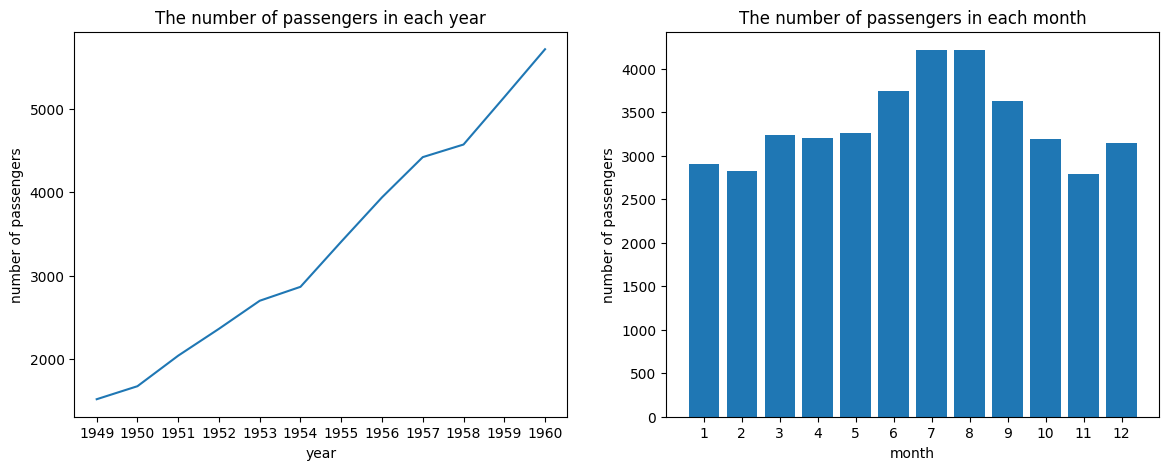

In [376]:
#Initialize a matplotlib subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

#Plot the yearly data
ax1.plot(data_byyear['passengers'])
ax1.set_title('The number of passengers in each year')
ax1.set_xlabel('year')
ax1.set_ylabel('number of passengers')
ax1.set_xticks(data_byyear.index) # to show all year index

#plot the monthly data
ax2.bar(data_bymonth.index, data_bymonth['passengers'])
ax2.set_title('The number of passengers in each month')
ax2.set_xlabel('month')
ax2.set_ylabel('number of passengers')
#ax2.set_xticks(data_bymonth.index)
ax2.set_xticks(data_bymonth.index,range(1,13))

#plt.tight_layout()# improve the layout
plt.show()

#### conclusion: 
1. From 1949 to 1960 the number of pagssenger per year increased nearly linerly. 
2. In Julys and Augusts the number of passgengers reaches its max.

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [387]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [388]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [389]:
data['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [390]:
data['sepal_length'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

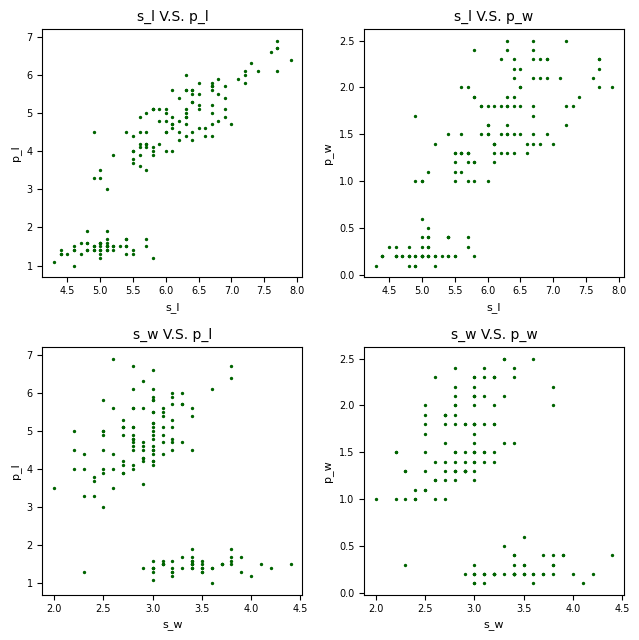

In [381]:
#Initialize a matplotlib subplot with 2 row and 2 columns
fig, ax = plt.subplots(2,2, figsize = (6.5,6.5))

ax[0,0].scatter(x = data['sepal_length'].values, y = data['petal_length'].values, s = 2, c = 'darkgreen')
ax[0,0].set_title('s_l V.S. p_l', fontsize=10)
ax[0,0].set_xlabel('s_l', fontsize=8)
ax[0,0].set_ylabel('p_l', fontsize=8)
ax[0,0].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize

ax[0,1].scatter(x = data['sepal_length'].values, y = data['petal_width'].values, s = 2, c = 'darkgreen')
ax[0,1].set_title('s_l V.S. p_w', fontsize=10)
ax[0,1].set_xlabel('s_l', fontsize=8)
ax[0,1].set_ylabel('p_w', fontsize=8)
ax[0,1].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize
#ax[0,1].tick_params(axis='both', which='minor', labelsize=5)


ax[1,0].scatter(x = data['sepal_width'].values, y = data['petal_length'].values, s = 2, c = 'darkgreen')
ax[1,0].set_title('s_w V.S. p_l', fontsize=10)
ax[1,0].set_xlabel('s_w', fontsize=8)
ax[1,0].set_ylabel('p_l', fontsize=8)
ax[1,0].tick_params(axis='both', which='major', labelsize=7)

ax[1,1].scatter(x = data['sepal_width'].values, y = data['petal_width'].values, s = 2, c = 'darkgreen')
ax[1,1].set_title('s_w V.S. p_w', fontsize=10)
ax[1,1].set_xlabel('s_w', fontsize=8)
ax[1,1].set_ylabel('p_w', fontsize=8)
ax[1,1].tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout()# improve the layout
plt.show()

In [385]:
# calculate Pearson Correlation coefficients
print('Pearson Correlation coefficient between sepal length & petal length:', np.corrcoef(data['sepal_length'].values, data['petal_length'].values)[0,1])
print('Pearson Correlation coefficient between sepal length & petal width:', np.corrcoef(data['sepal_length'].values, data['petal_width'].values)[0,1])
print('Pearson Correlation coefficient between sepal width & petal length:', np.corrcoef(data['sepal_width'].values, data['petal_length'].values)[0,1])
print('Pearson Correlation coefficient between sepal width & petal width:', np.corrcoef(data['sepal_width'].values, data['petal_width'].values)[0,1])

Pearson Correlation coefficient between sepal length & petal length: 0.8717537758865831
Pearson Correlation coefficient between sepal length & petal width: 0.8179411262715757
Pearson Correlation coefficient between sepal width & petal length: -0.4284401043305394
Pearson Correlation coefficient between sepal width & petal width: -0.36612593253643927


#### Conclusion:
1. sepal length is strongly positively correlated with petal length and petal width.
2. sepal width is weakly negatively correlated with petal length and petal width.

2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

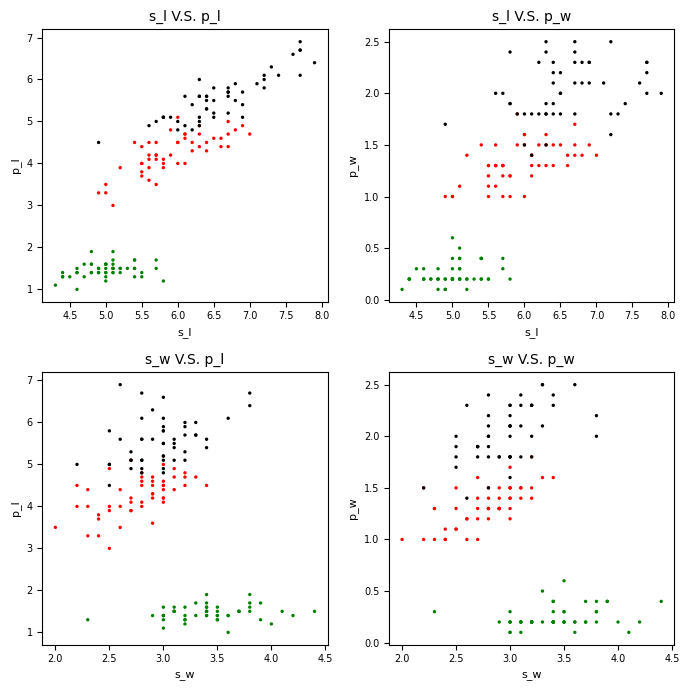

In [391]:
#Initialize a matplotlib subplot with 2 row and 2 columns
fig, ax = plt.subplots(2,2, figsize = (7,7))
color_map = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'black'}

ax[0,0].scatter(x = data['sepal_length'].values, y = data['petal_length'].values, s = 2, c = data['species'].map(color_map))
ax[0,0].set_title('s_l V.S. p_l', fontsize=10)
ax[0,0].set_xlabel('s_l', fontsize=8)
ax[0,0].set_ylabel('p_l', fontsize=8)
ax[0,0].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize

ax[0,1].scatter(x = data['sepal_length'].values, y = data['petal_width'].values, s = 2, c = data['species'].map(color_map))
ax[0,1].set_title('s_l V.S. p_w', fontsize=10)
ax[0,1].set_xlabel('s_l', fontsize=8)
ax[0,1].set_ylabel('p_w', fontsize=8)
ax[0,1].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize
#ax[0,1].tick_params(axis='both', which='minor', labelsize=5)


ax[1,0].scatter(x = data['sepal_width'].values, y = data['petal_length'].values, s = 2, c = data['species'].map(color_map))
ax[1,0].set_title('s_w V.S. p_l', fontsize=10)
ax[1,0].set_xlabel('s_w', fontsize=8)
ax[1,0].set_ylabel('p_l', fontsize=8)
ax[1,0].tick_params(axis='both', which='major', labelsize=7)

ax[1,1].scatter(x = data['sepal_width'].values, y = data['petal_width'].values, s = 2, c = data['species'].map(color_map))
ax[1,1].set_title('s_w V.S. p_w', fontsize=10)
ax[1,1].set_xlabel('s_w', fontsize=8)
ax[1,1].set_ylabel('p_w', fontsize=8)
ax[1,1].tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout()# improve the layout
plt.show()

3 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [392]:
setosa = data.loc[data['species']=='setosa']
versicolor = data.loc[data['species']=='versicolor']
virginica = data.loc[data['species']=='virginica']

In [393]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

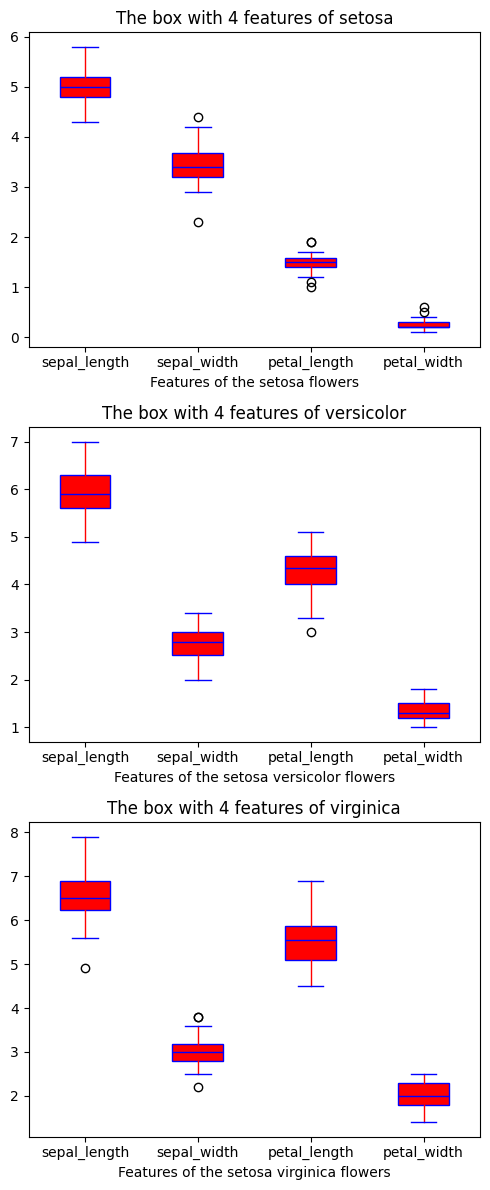

In [394]:
fig, ax = plt.subplots(3, 1, figsize = (5,12))

ax[0].boxplot(setosa[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
            labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )
ax[0].set_title('The box with 4 features of setosa')
ax[0].set_xlabel('Features of the setosa flowers')

ax[1].boxplot(versicolor[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
            labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            patch_artist = True, #boxes are drawn with Patch artists,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )
ax[1].set_title('The box with 4 features of versicolor')
ax[1].set_xlabel('Features of the setosa versicolor flowers')

ax[2].boxplot(virginica[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
            labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            patch_artist = True, #boxes are drawn with Patch artists,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )
ax[2].set_title('The box with 4 features of virginica')
ax[2].set_xlabel('Features of the setosa virginica flowers')

plt.tight_layout()
plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [2]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. 小费和总消费之间的关系（提示：散点图+回归分析）

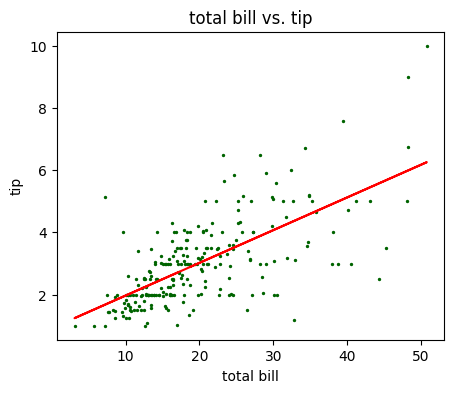

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['total_bill'].values, data['tip'].values)
fig, ax = plt.subplots(figsize = (5,4))
ax.scatter(x = data['total_bill'].values, y = data['tip'].values, s = 2, c = 'darkgreen')
ax.plot(data['total_bill'].values, slope * data['total_bill'].values + intercept, c = 'red')
ax.set_title('total bill vs. tip')
ax.set_xlabel('total bill')
ax.set_ylabel('tip')
plt.show()

2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

In [43]:
data_female = data.loc[data['sex']=='Female']
data_male = data.loc[data['sex']=='Male']

Text(0, 0.5, 'values of tip')

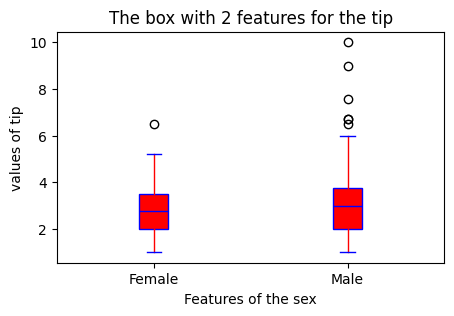

In [47]:
fig = plt.figure(figsize = (5,3))

plt.boxplot([data_female['tip'].values, data_male['tip'].values], 
            labels = ['Female', 'Male'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the sex')
plt.ylabel('values of tip')

3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

Text(0, 0.5, 'values of tip')

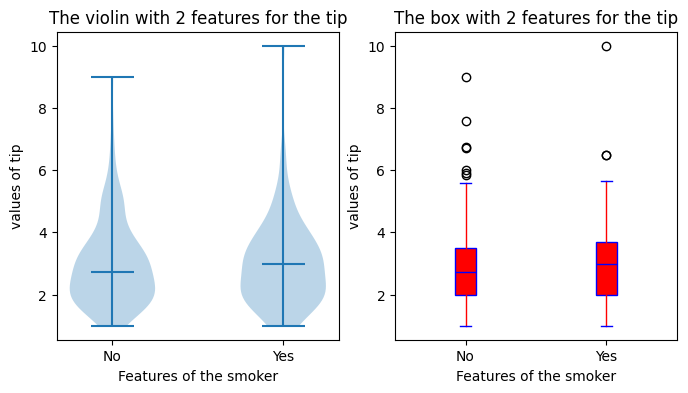

In [71]:
data_No = data.loc[data['smoker']=='No']
data_Yes = data.loc[data['smoker']=='Yes']


fig, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].violinplot([data_No['tip'].values, data_Yes['tip'].values], 
                 showmedians=True,
                 #showmeans = True,
                 #labels = ['No', 'Yes'],
                 #color = 'red'
           )

ax[0].set_title('The violin with 2 features for the tip')
ax[0].set_xlabel('Features of the smoker')
ax[0].set_ylabel('values of tip')
ax[0].set_xticks([1,2], ['No', 'Yes'])

ax[1].boxplot([data_No['tip'].values, data_Yes['tip'].values], 
            labels = ['No', 'Yes'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
           boxprops = dict(facecolor = 'red', color = 'blue')
           )

ax[1].set_title('The box with 2 features for the tip')
ax[1].set_xlabel('Features of the smoker')
ax[1].set_ylabel('values of tip')



4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

In [73]:
data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Text(0, 0.5, 'Values of tip')

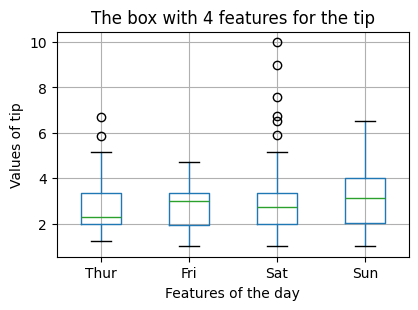

In [97]:
# use boxplot function of pandas
data.boxplot(column = 'tip', by = 'day', figsize = (4.4,3))
plt.title('The box with 4 features for the tip')
plt.suptitle('')# remove the suptitle
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')

In [173]:
day_list = list(data['day'].unique())

data_day = []
for day_selected in day_list:
    data_day.append(data.loc[data['day'] == day_selected]['tip'].values)
    

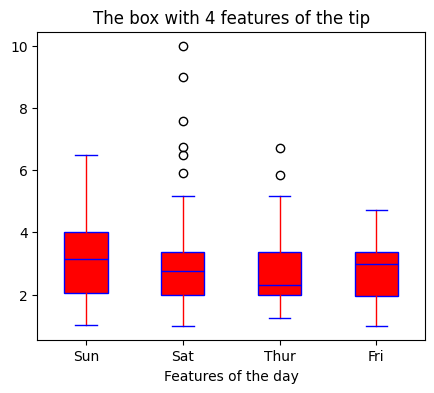

In [174]:
plt.figure(figsize = (5,4))
plt.boxplot(data_day, labels = day_list, 
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 4 features of the tip')
plt.xlabel('Features of the day')
plt.show() 

5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

In [101]:
data['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

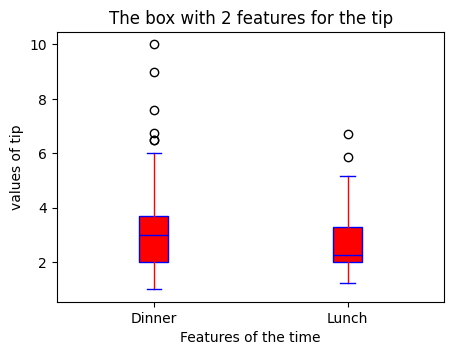

In [104]:
data_lunch = data.loc[data['time']=='Lunch']
data_dinner = data.loc[data['time']=='Dinner']
fig = plt.figure(figsize = (5,3.5))

plt.boxplot([data_dinner['tip'].values, data_lunch['tip'].values], 
            labels = ['Dinner', 'Lunch'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the time')
plt.ylabel('values of tip')
plt.show()

6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

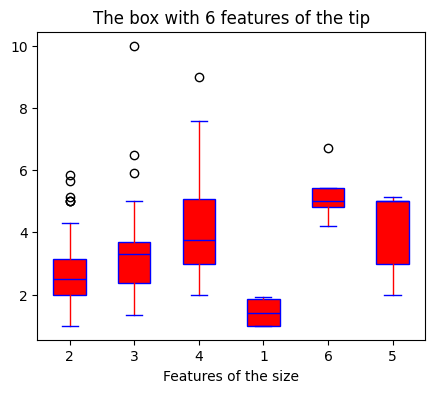

In [175]:
size_list = list(data['size'].unique())

data_size = []
for size_selected in size_list:
    data_size.append(data.loc[data['size'] == size_selected]['tip'].values)

plt.figure(figsize = (5,4))
plt.boxplot(data_size, labels = size_list, 
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 6 features of the tip')
plt.xlabel('Features of the size')
plt.show() 

7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


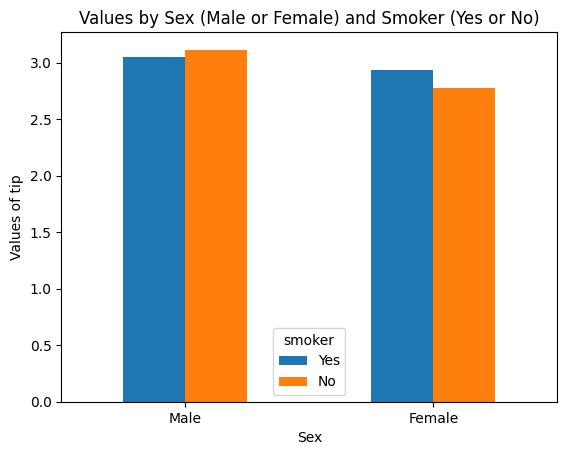

In [198]:
sex_smoker = data.groupby(['sex', 'smoker'], observed = False)['tip'].mean().unstack()
print(sex_smoker)

# use plot function of pandas
sex_smoker.plot(kind = 'bar')
plt.title('Values by Sex (Male or Female) and Smoker (Yes or No)')
plt.xlabel('Sex')
plt.ylabel('Values of tip')
plt.xticks(rotation = 0)
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [199]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [284]:
data.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

In [229]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [231]:
data['unsurvived'] = 1-data.survived #add a new column
survived_unsurvived = data.groupby('pclass')[['survived','unsurvived']].sum()
survived_unsurvived['total'] = survived_unsurvived['survived'] + survived_unsurvived['unsurvived']
survived_unsurvived['survived_prop'] =  survived_unsurvived['survived']/survived_unsurvived['total']
survived_unsurvived['unsurvived_prop'] =  survived_unsurvived['unsurvived']/survived_unsurvived['total']
survived_unsurvived

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


In [246]:
survived_unsurvived.index.values

array([1, 2, 3])

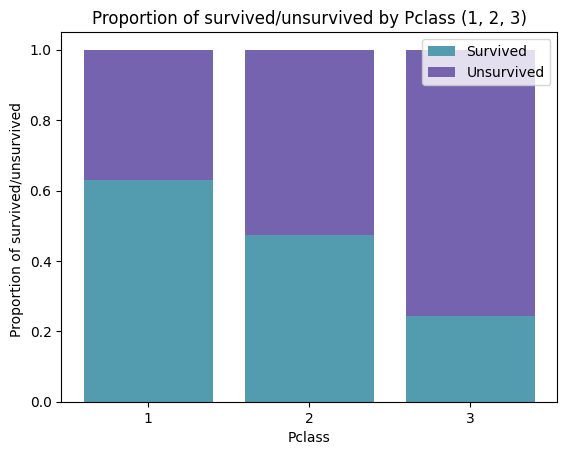

In [261]:
plt.bar(survived_unsurvived.index.values,survived_unsurvived['survived_prop'], color = '#539caf', label = 'Survived' )
plt.bar(survived_unsurvived.index.values,survived_unsurvived['unsurvived_prop'], color = '#7663b0',
        bottom = survived_unsurvived['survived_prop'], label = 'Unsurvived')
plt.xticks([1,2,3]) # important, otherwise, the x axis show half integer ticks
plt.title('Proportion of survived/unsurvived by Pclass (1, 2, 3)')
plt.xlabel('Pclass')
plt.ylabel('Proportion of survived/unsurvived ')
plt.legend(loc = 'best')# show the labels
plt.show()        

2. 不同性别的幸存比例（提示：箱图或者提琴图）

In [266]:
survived_unsurvived_sex = data.groupby('sex')[['survived','unsurvived']].sum()
survived_unsurvived_sex['total'] = survived_unsurvived_sex['survived'] + survived_unsurvived_sex['unsurvived']
survived_unsurvived_sex['survived_prop'] =  survived_unsurvived_sex['survived']/survived_unsurvived_sex['total']
survived_unsurvived_sex['unsurvived_prop'] =  survived_unsurvived_sex['unsurvived']/survived_unsurvived_sex['total']
survived_unsurvived_sex

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


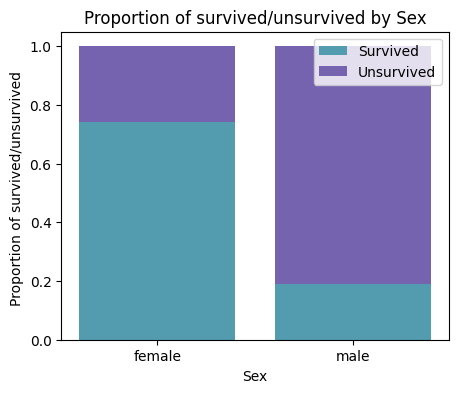

In [277]:
plt.figure(figsize = (5,4))
plt.bar(survived_unsurvived_sex.index.values,survived_unsurvived_sex['survived_prop'], color = '#539caf', label = 'Survived' )
plt.bar(survived_unsurvived_sex.index.values,survived_unsurvived_sex['unsurvived_prop'], color = '#7663b0',
        bottom = survived_unsurvived_sex['survived_prop'], label = 'Unsurvived')
plt.title('Proportion of survived/unsurvived by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of survived/unsurvived ')
plt.legend(loc = 'best')# show the labels
plt.show()     

3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

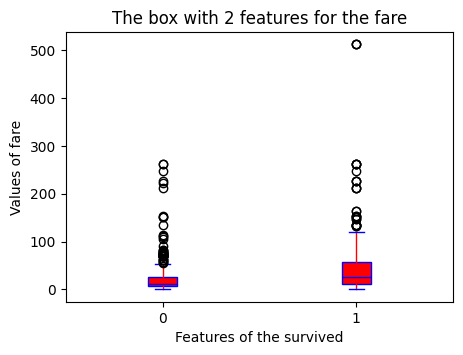

In [281]:
data_survived = data.loc[data['survived']==1]
data_unsurvived = data.loc[data['survived']==0]
fig = plt.figure(figsize = (5,3.5))

plt.boxplot([data_unsurvived['fare'].values, data_survived['fare'].values], 
            labels = ['0', '1'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 2 features for the fare')
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.show()

4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

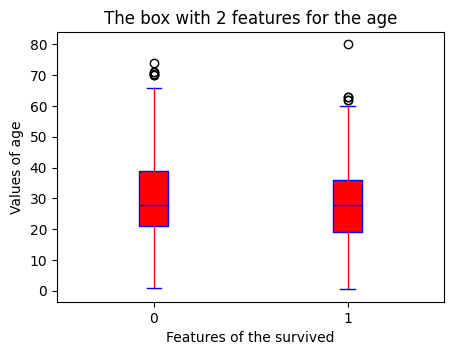

In [293]:
data_survived = data.loc[data['survived']==1]
data_unsurvived = data.loc[data['survived']==0]


fig = plt.figure(figsize = (5,3.5))

plt.boxplot([data_unsurvived['age'].dropna().values, data_survived['age'].dropna().values], # dropna to remove nan values
            labels = ['0', '1'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 2 features for the age')
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.show()

5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

In [316]:
embarked_plcass = data.groupby(['embarked', 'pclass']).size().unstack()
embarked_plcass

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


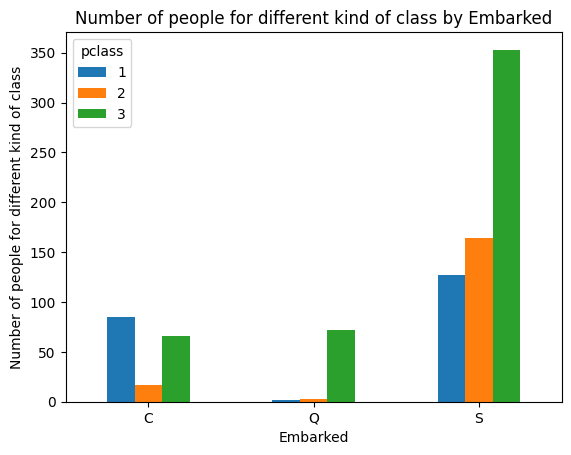

In [319]:
embarked_plcass.plot(kind = 'bar')
plt.title('Number of people for different kind of class by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of people for different kind of class')
plt.xticks(rotation = 0)
plt.show()

6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

In [343]:
N_sibsp = data.groupby('sibsp').size()
N_sibsp

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [345]:
N_sibsp_x = data.groupby('sibsp')[['survived','unsurvived']].sum()
N_sibsp_x

,survived,unsurvived
sibsp,,
0,210,398
1,112,97
2,13,15
3,4,12
4,3,15
5,0,5
8,0,7


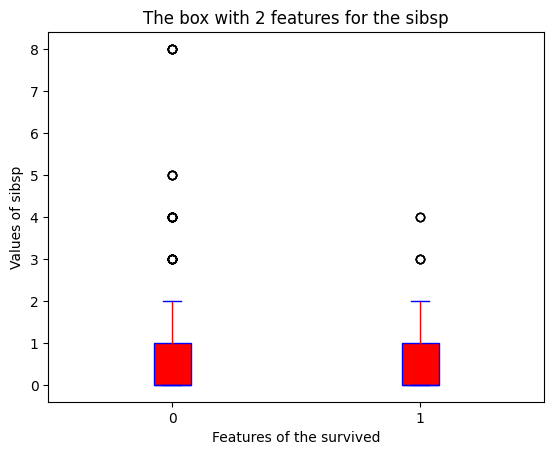

In [347]:
plt.boxplot([data[data['survived'] == 0]['sibsp'].values, data[data['survived'] == 1]['sibsp'].values],
                       labels = ['0', '1'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 2 features for the sibsp')
plt.xlabel('Features of the survived')
plt.ylabel('Values of sibsp')
plt.show()

7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

In [348]:
N_parch = data.groupby('parch').size()
N_parch

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

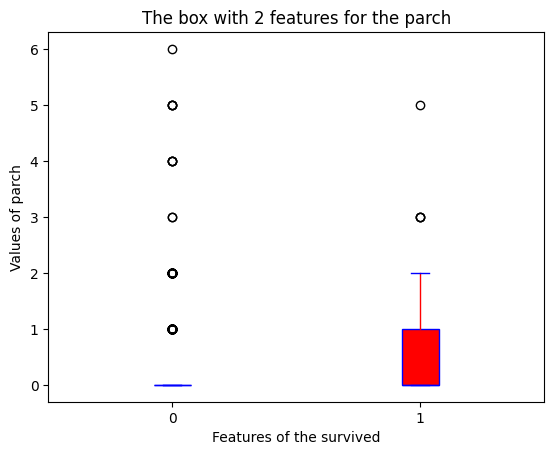

In [349]:
plt.boxplot([data[data['survived'] == 0]['parch'].values, data[data['survived'] == 1]['parch'].values],
                       labels = ['0', '1'],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            boxprops = dict(facecolor = 'red', color = 'blue')
           )

plt.title('The box with 2 features for the parch')
plt.xlabel('Features of the survived')
plt.ylabel('Values of parch')
plt.show()

8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [351]:
alone_survived = data.groupby(['alone', 'survived']).size().unstack()
alone_survived

survived,0,1
alone,,
False,175,179
True,374,163


In [361]:
alone_survived.index.values

array([False,  True])

In [354]:
alone_survived.columns

Index([0, 1], dtype='int64', name='survived')

In [355]:
alone_survived[0]

alone
False    175
True     374
Name: 0, dtype: int64

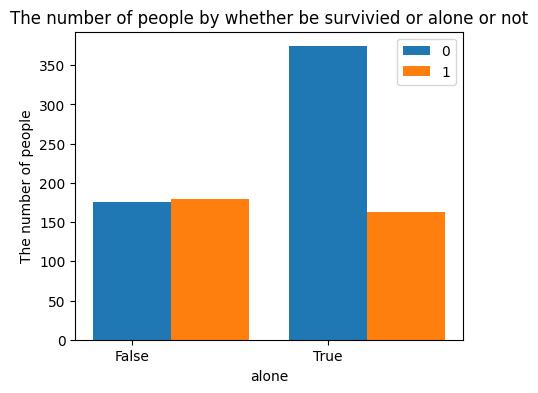

In [369]:
width = 0.4
fig = plt.figure(figsize = (5, 4))
plt.bar(alone_survived.index.values, alone_survived[0], width = 0.4, label = '0')
plt.bar(alone_survived.index.values + width, alone_survived[1], width = 0.4, label = '1')
plt.title('The number of people by whether be survivied or alone or not')
plt.xlabel('alone')
plt.ylabel('The number of people')
#plt.xticks(alone_survived.index.values)
plt.xticks(alone_survived.index.values, ['False', 'True'])
plt.legend()
plt.show()